# Practical Statistics for Data Scientists — Data and Sampling Distributions

In [1]:
from scipy.stats import trim_mean
from statsmodels import robust
from sklearn.utils import resample

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/afi1289/practical-statistics/loan200.csv
/kaggle/input/datasets/afi1289/practical-statistics/four_sessions.csv
/kaggle/input/datasets/afi1289/practical-statistics/loan3000.csv
/kaggle/input/datasets/afi1289/practical-statistics/state.csv
/kaggle/input/datasets/afi1289/practical-statistics/imanishi_data.csv
/kaggle/input/datasets/afi1289/practical-statistics/loans_income.csv
/kaggle/input/datasets/afi1289/practical-statistics/lc_loans.csv
/kaggle/input/datasets/afi1289/practical-statistics/airline_stats.csv
/kaggle/input/datasets/afi1289/practical-statistics/sp500_sectors.csv
/kaggle/input/datasets/afi1289/practical-statistics/loan_data.csv
/kaggle/input/datasets/afi1289/practical-statistics/LungDisease.csv
/kaggle/input/datasets/afi1289/practical-statistics/click_rates.csv
/kaggle/input/datasets/afi1289/practical-statistics/kc_tax.csv
/kaggle/input/datasets/afi1289/practical-statistics/full_train_set.csv
/kaggle/input/datasets/afi1289/practical-statistics/sp500_d

## Random Sampling and Sample Bias

- Population is the larger data set
- Sample is a subset of this larger data set
- Data quality: completeness, cleanliness, consistent format, representativeness

`Central Limit Theorem`: The means drawn from multiple samples will resemble the Normal Distribution (bell curve)

In [2]:
loans_income = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/loans_income.csv").squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [3]:
sample_data = pd.DataFrame({
    "income": loans_income.sample(1000),
    "type": "Data" 
})

sample_mean_5 = pd.DataFrame({
    "income": [loans_income.sample(5).mean() for _ in range(1000)],
    "type": "Mean of 5" 
})

sample_mean_20 = pd.DataFrame({
    "income": [loans_income.sample(20).mean() for _ in range(1000)],
    "type": "Mean of 20" 
})

results = pd.concat([sample_data, sample_mean_5, sample_mean_20])
results.head()

,income,type
7692,50000.0,Data
26552,59798.0,Data
6199,180000.0,Data
24034,97000.0,Data
24351,72500.0,Data


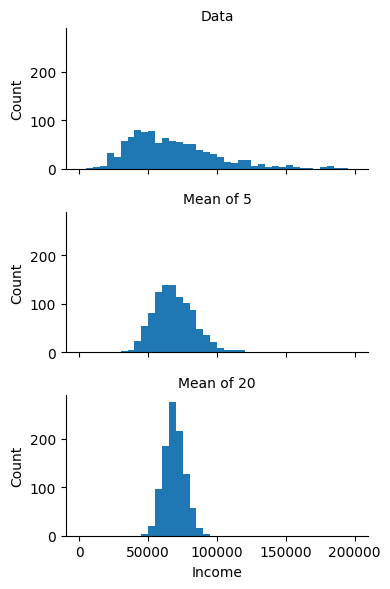

In [4]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)

g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## Bootstrap

Resampling and recalculating the statistics

In [5]:
results = []

for _ in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -75.28450000000157
std. error: 215.18579817796538


## Confidence Intervals



68760.51844
55734.1


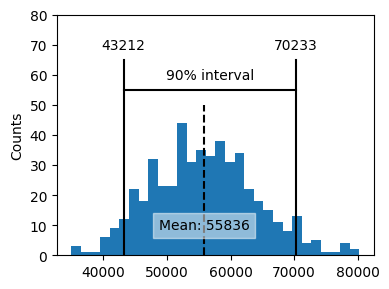

In [6]:
print(loans_income.mean())
np.random.seed(seed=3)  

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results = []

for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())

results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')

ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()